### LSTM quick implementation 

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

/home/jasonchandatascience/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [66]:
# helper functions

# Some functions to help out with
def plot_predictions(test,predicted):
    plt.figure(figsize=(15, 8))
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [7]:
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [14]:
training_set = dataset[: '2016'].iloc[:, 1:2].values
test_set = dataset['2017': ].iloc[:, 1:2].values

### Quick Plot

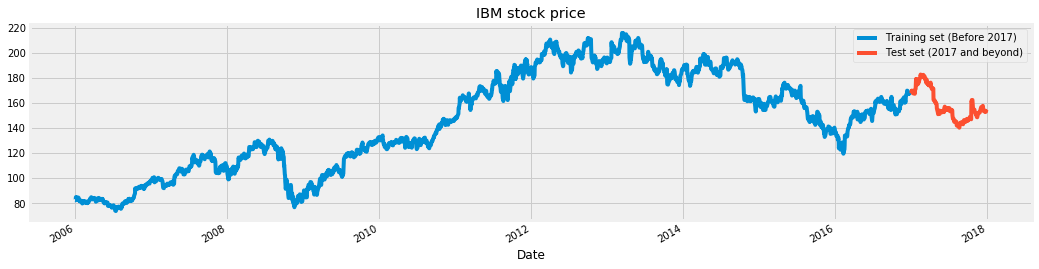

In [17]:
dataset["High"][: '2016'].plot(figsize=(16, 4), legend=True)
dataset["High"]['2017': ].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

### Scaling

In [18]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [19]:
training_set.shape

(2769, 1)

### Sequencing

In [30]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [26]:
training_set_scaled[0:60, 0]


array([0.06065089, 0.06029868, 0.06311637, 0.0781206 , 0.07262609,
       0.07171034, 0.07657087, 0.07058326, 0.0669907 , 0.06494787,
       0.075796  , 0.07361229, 0.06417301, 0.05621302, 0.05783319,
       0.05409975, 0.05431107, 0.05515638, 0.05543815, 0.05677656,
       0.05846717, 0.05388842, 0.04811214, 0.04233587, 0.04402649,
       0.0490279 , 0.04832347, 0.05297267, 0.05614258, 0.05290223,
       0.05325444, 0.04909834, 0.04994365, 0.04797126, 0.05431107,
       0.05212736, 0.04726684, 0.04895745, 0.04656241, 0.04839391,
       0.04416737, 0.0485348 , 0.04719639, 0.04825303, 0.05395886,
       0.05663567, 0.05853762, 0.05959425, 0.06375035, 0.06917442,
       0.06889265, 0.06670893, 0.06910397, 0.07783883, 0.07565511,
       0.07276698, 0.06889265, 0.0656523 , 0.06656805, 0.06769513])

In [29]:
training_set_scaled[60, 0]

0.06875176105945335

In [36]:
X_train[0]

array([0.06065089, 0.06029868, 0.06311637, 0.0781206 , 0.07262609,
       0.07171034, 0.07657087, 0.07058326, 0.0669907 , 0.06494787,
       0.075796  , 0.07361229, 0.06417301, 0.05621302, 0.05783319,
       0.05409975, 0.05431107, 0.05515638, 0.05543815, 0.05677656,
       0.05846717, 0.05388842, 0.04811214, 0.04233587, 0.04402649,
       0.0490279 , 0.04832347, 0.05297267, 0.05614258, 0.05290223,
       0.05325444, 0.04909834, 0.04994365, 0.04797126, 0.05431107,
       0.05212736, 0.04726684, 0.04895745, 0.04656241, 0.04839391,
       0.04416737, 0.0485348 , 0.04719639, 0.04825303, 0.05395886,
       0.05663567, 0.05853762, 0.05959425, 0.06375035, 0.06917442,
       0.06889265, 0.06670893, 0.06910397, 0.07783883, 0.07565511,
       0.07276698, 0.06889265, 0.0656523 , 0.06656805, 0.06769513])

In [37]:
X_train[1]

array([0.06029868, 0.06311637, 0.0781206 , 0.07262609, 0.07171034,
       0.07657087, 0.07058326, 0.0669907 , 0.06494787, 0.075796  ,
       0.07361229, 0.06417301, 0.05621302, 0.05783319, 0.05409975,
       0.05431107, 0.05515638, 0.05543815, 0.05677656, 0.05846717,
       0.05388842, 0.04811214, 0.04233587, 0.04402649, 0.0490279 ,
       0.04832347, 0.05297267, 0.05614258, 0.05290223, 0.05325444,
       0.04909834, 0.04994365, 0.04797126, 0.05431107, 0.05212736,
       0.04726684, 0.04895745, 0.04656241, 0.04839391, 0.04416737,
       0.0485348 , 0.04719639, 0.04825303, 0.05395886, 0.05663567,
       0.05853762, 0.05959425, 0.06375035, 0.06917442, 0.06889265,
       0.06670893, 0.06910397, 0.07783883, 0.07565511, 0.07276698,
       0.06889265, 0.0656523 , 0.06656805, 0.06769513, 0.06875176])

In [40]:
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshape
Remember we need to reshape LSTM training data into [samples, time steps, features]

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [45]:
from keras.callbacks import TensorBoard
import time

In [46]:
# Model name for Tensorboard
NAME = f"IBM_{int(time.time())}"

tensorboard = TensorBoard(log_dir = f"logs/{NAME}")

regressor = Sequential()

regressor.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

regressor.compile(optimizer="rmsprop", loss="mean_squared_error")

regressor.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[tensorboard])

Epoch 1/50
2709/2709 [==============================] - 22s 8ms/step - loss: 0.0236
Epoch 2/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0102
Epoch 3/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0083
Epoch 4/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0068
Epoch 5/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0064
Epoch 6/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0057
Epoch 7/50
2709/2709 [==============================] - 21s 8ms/step - loss: 0.0050
Epoch 8/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0044
Epoch 9/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0045
Epoch 10/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0037
Epoch 11/50
2709/2709 [==============================] - 18s 6ms/step - loss: 0.0037
Epoch 12/50
2709/2709 [==============================] - 17s 6ms/step - lo

### Test set prep

In [77]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values

In [78]:
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [79]:
# Preparing X_test and predicting the prices
X_test = []
y_test = []

for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])

In [80]:
X_test = np.array(X_test)

In [90]:
y_test = np.array(y_test)

In [81]:
X_test.shape

(251, 60)

In [82]:
# reshape into [samples, timestep, features]
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

### Predictions

In [83]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

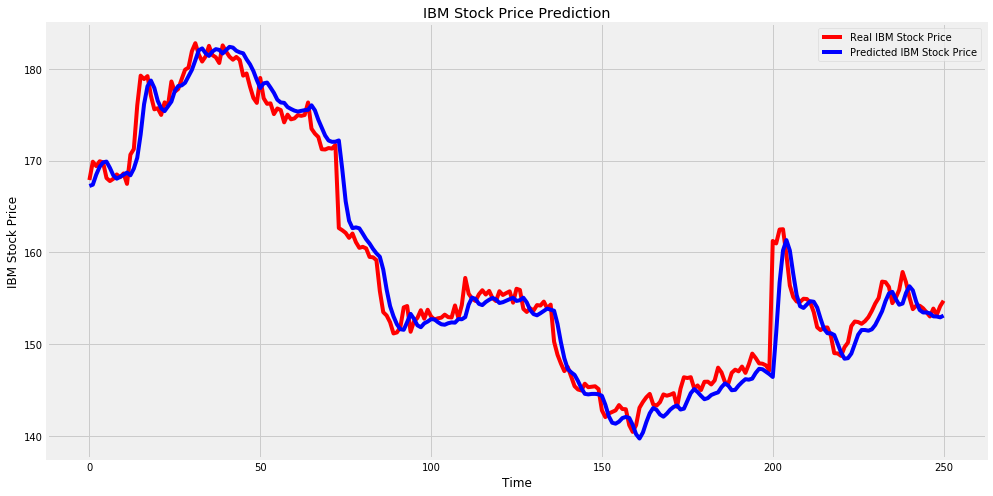

In [84]:
plot_predictions(test_set, predicted_stock_price)

In [91]:
# Model name for Tensorboard
NAME = f"IBM_{int(time.time())}"

tensorboard = TensorBoard(log_dir = f"logs/{NAME}")

regressor = Sequential()

regressor.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(50))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

regressor.compile(optimizer="rmsprop", loss="mean_squared_error")

regressor.fit(X_train, y_train, epochs=50, batch_size=32,validation_data=(X_test, y_test), callbacks=[tensorboard], verbose=2)

Train on 2709 samples, validate on 251 samples
Epoch 1/50
 - 29s - loss: 0.0261 - val_loss: 0.0025
Epoch 2/50
 - 17s - loss: 0.0106 - val_loss: 0.0081
Epoch 3/50
 - 18s - loss: 0.0087 - val_loss: 0.0011
Epoch 4/50
 - 18s - loss: 0.0072 - val_loss: 0.0145
Epoch 5/50
 - 17s - loss: 0.0062 - val_loss: 0.0013
Epoch 6/50
 - 19s - loss: 0.0057 - val_loss: 0.0011
Epoch 7/50
 - 17s - loss: 0.0049 - val_loss: 0.0044
Epoch 8/50
 - 18s - loss: 0.0047 - val_loss: 0.0016
Epoch 9/50
 - 18s - loss: 0.0042 - val_loss: 0.0053
Epoch 10/50
 - 17s - loss: 0.0039 - val_loss: 0.0042
Epoch 11/50
 - 17s - loss: 0.0037 - val_loss: 8.5617e-04
Epoch 12/50
 - 18s - loss: 0.0037 - val_loss: 8.4361e-04
Epoch 13/50
 - 17s - loss: 0.0032 - val_loss: 0.0036
Epoch 14/50
 - 17s - loss: 0.0031 - val_loss: 0.0019
Epoch 15/50
 - 17s - loss: 0.0029 - val_loss: 0.0011
Epoch 16/50
 - 17s - loss: 0.0029 - val_loss: 0.0017
Epoch 17/50
 - 17s - loss: 0.0030 - val_loss: 4.9187e-04
Epoch 18/50
 - 17s - loss: 0.0027 - val_loss: 9.7

In [92]:
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 2.151426684807522.


In [93]:
regressor.history.history.keys()

dict_keys(['val_loss', 'loss'])

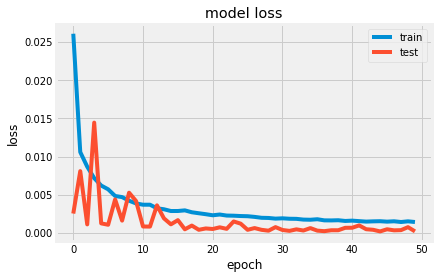

In [94]:
plt.plot(regressor.history.history['loss'])
plt.plot(regressor.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()